In [3]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./경찰청_범죄자 마약류 등 상용여부_12_31_2020.csv', encoding='cp949') # 현재 위치에 있는 csv파일 불러옴
df.head()

,범죄대분류,범죄중분류,계,마약류(소계),마약류(마약),마약류(대마),마약류(향정신성의약품),본드신나등,알코올,해당무,미상
0,강력범죄,소계,26971,49,15,1,33,4,2823,17634,6461
1,강력범죄,살인기수,341,3,2,0,1,1,16,230,91
2,강력범죄,살인미수등,454,2,1,0,1,0,44,326,82
3,강력범죄,강도,1202,8,2,0,6,0,34,1013,147
4,강력범죄,강간,6113,24,4,1,19,2,584,3286,2217


최근 국내 마약 문제가 심각해졌다는 기사를 많이 접하게 되었다.
그래서 일어나는 범죄 중 마약을 투여한 후 범죄를 저지른 사건의 비율이 얼마나 될지, 알코올 섭취 후 저지르는 범죄의 수 그리고 마약 섭취를 하지 않은 범죄의 데이터를
비교해보고 범죄율이 높을 경우 마약 혹은 알코올 섭취 후 일어나는 범죄는 예방이 가능하기 때문에
범죄율을 낮추는 데에 도움이 될 수 있을 것 같아 해당 데이터를 선택하였다.
해당 데이터는 범죄별로 마약류(마약), 대마, 알코올 등 섭취 후 발생한 사건의 수를 보여준다.
마약 문제가 심각해진 만큼 분석 결과 마약과 관련된 범죄율이 높을 것이라고 생각한다.

In [6]:
# 결측치를 해당 열의 최빈값으로 대체
df.fillna(df.mode().iloc[0], inplace=True)

In [7]:
df = df[~df['범죄중분류'].str.contains('소계')] # 합계 값은 필요없으므로 '범죄중분류' 열에서 '소계'가 포함된 행을 제외하고 선택
print(df.head()) # 제대로 적용되었는지 처음 5개의 행 출력

  범죄대분류  범죄중분류     계   마약류(소계)  마약류(마약)  마약류(대마)  마약류(향정신성의약품)  본드신나등  알코올  \
1  강력범죄   살인기수   341         3        2        0             1      1   16   
2  강력범죄  살인미수등   454         2        1        0             1      0   44   
3  강력범죄     강도  1202         8        2        0             6      0   34   
4  강력범죄     강간  6113        24        4        1            19      2  584   
5  강력범죄   유사강간   934         0        0        0             0      0   90   

    해당무    미상  
1   230    91  
2   326    82  
3  1013   147  
4  3286  2217  
5   612   232  


In [8]:
select = ['범죄중분류', '마약류(마약)', '마약류(대마)', '마약류(향정신성의약품)', '본드신나등', '알코올', '해당무', '미상'] #필요한 열만 선택
crime_df = df[select].copy() # 선택한 열의 값만을 가진 데이터프레임 생성
print(crime_df.head())

   범죄중분류  마약류(마약)  마약류(대마)  마약류(향정신성의약품)  본드신나등  알코올   해당무    미상
1   살인기수        2        0             1      1   16   230    91
2  살인미수등        1        0             1      0   44   326    82
3     강도        2        0             6      0   34  1013   147
4     강간        4        1            19      2  584  3286  2217
5   유사강간        0        0             0      0   90   612   232


<Axes: xlabel='미상'>

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Gl

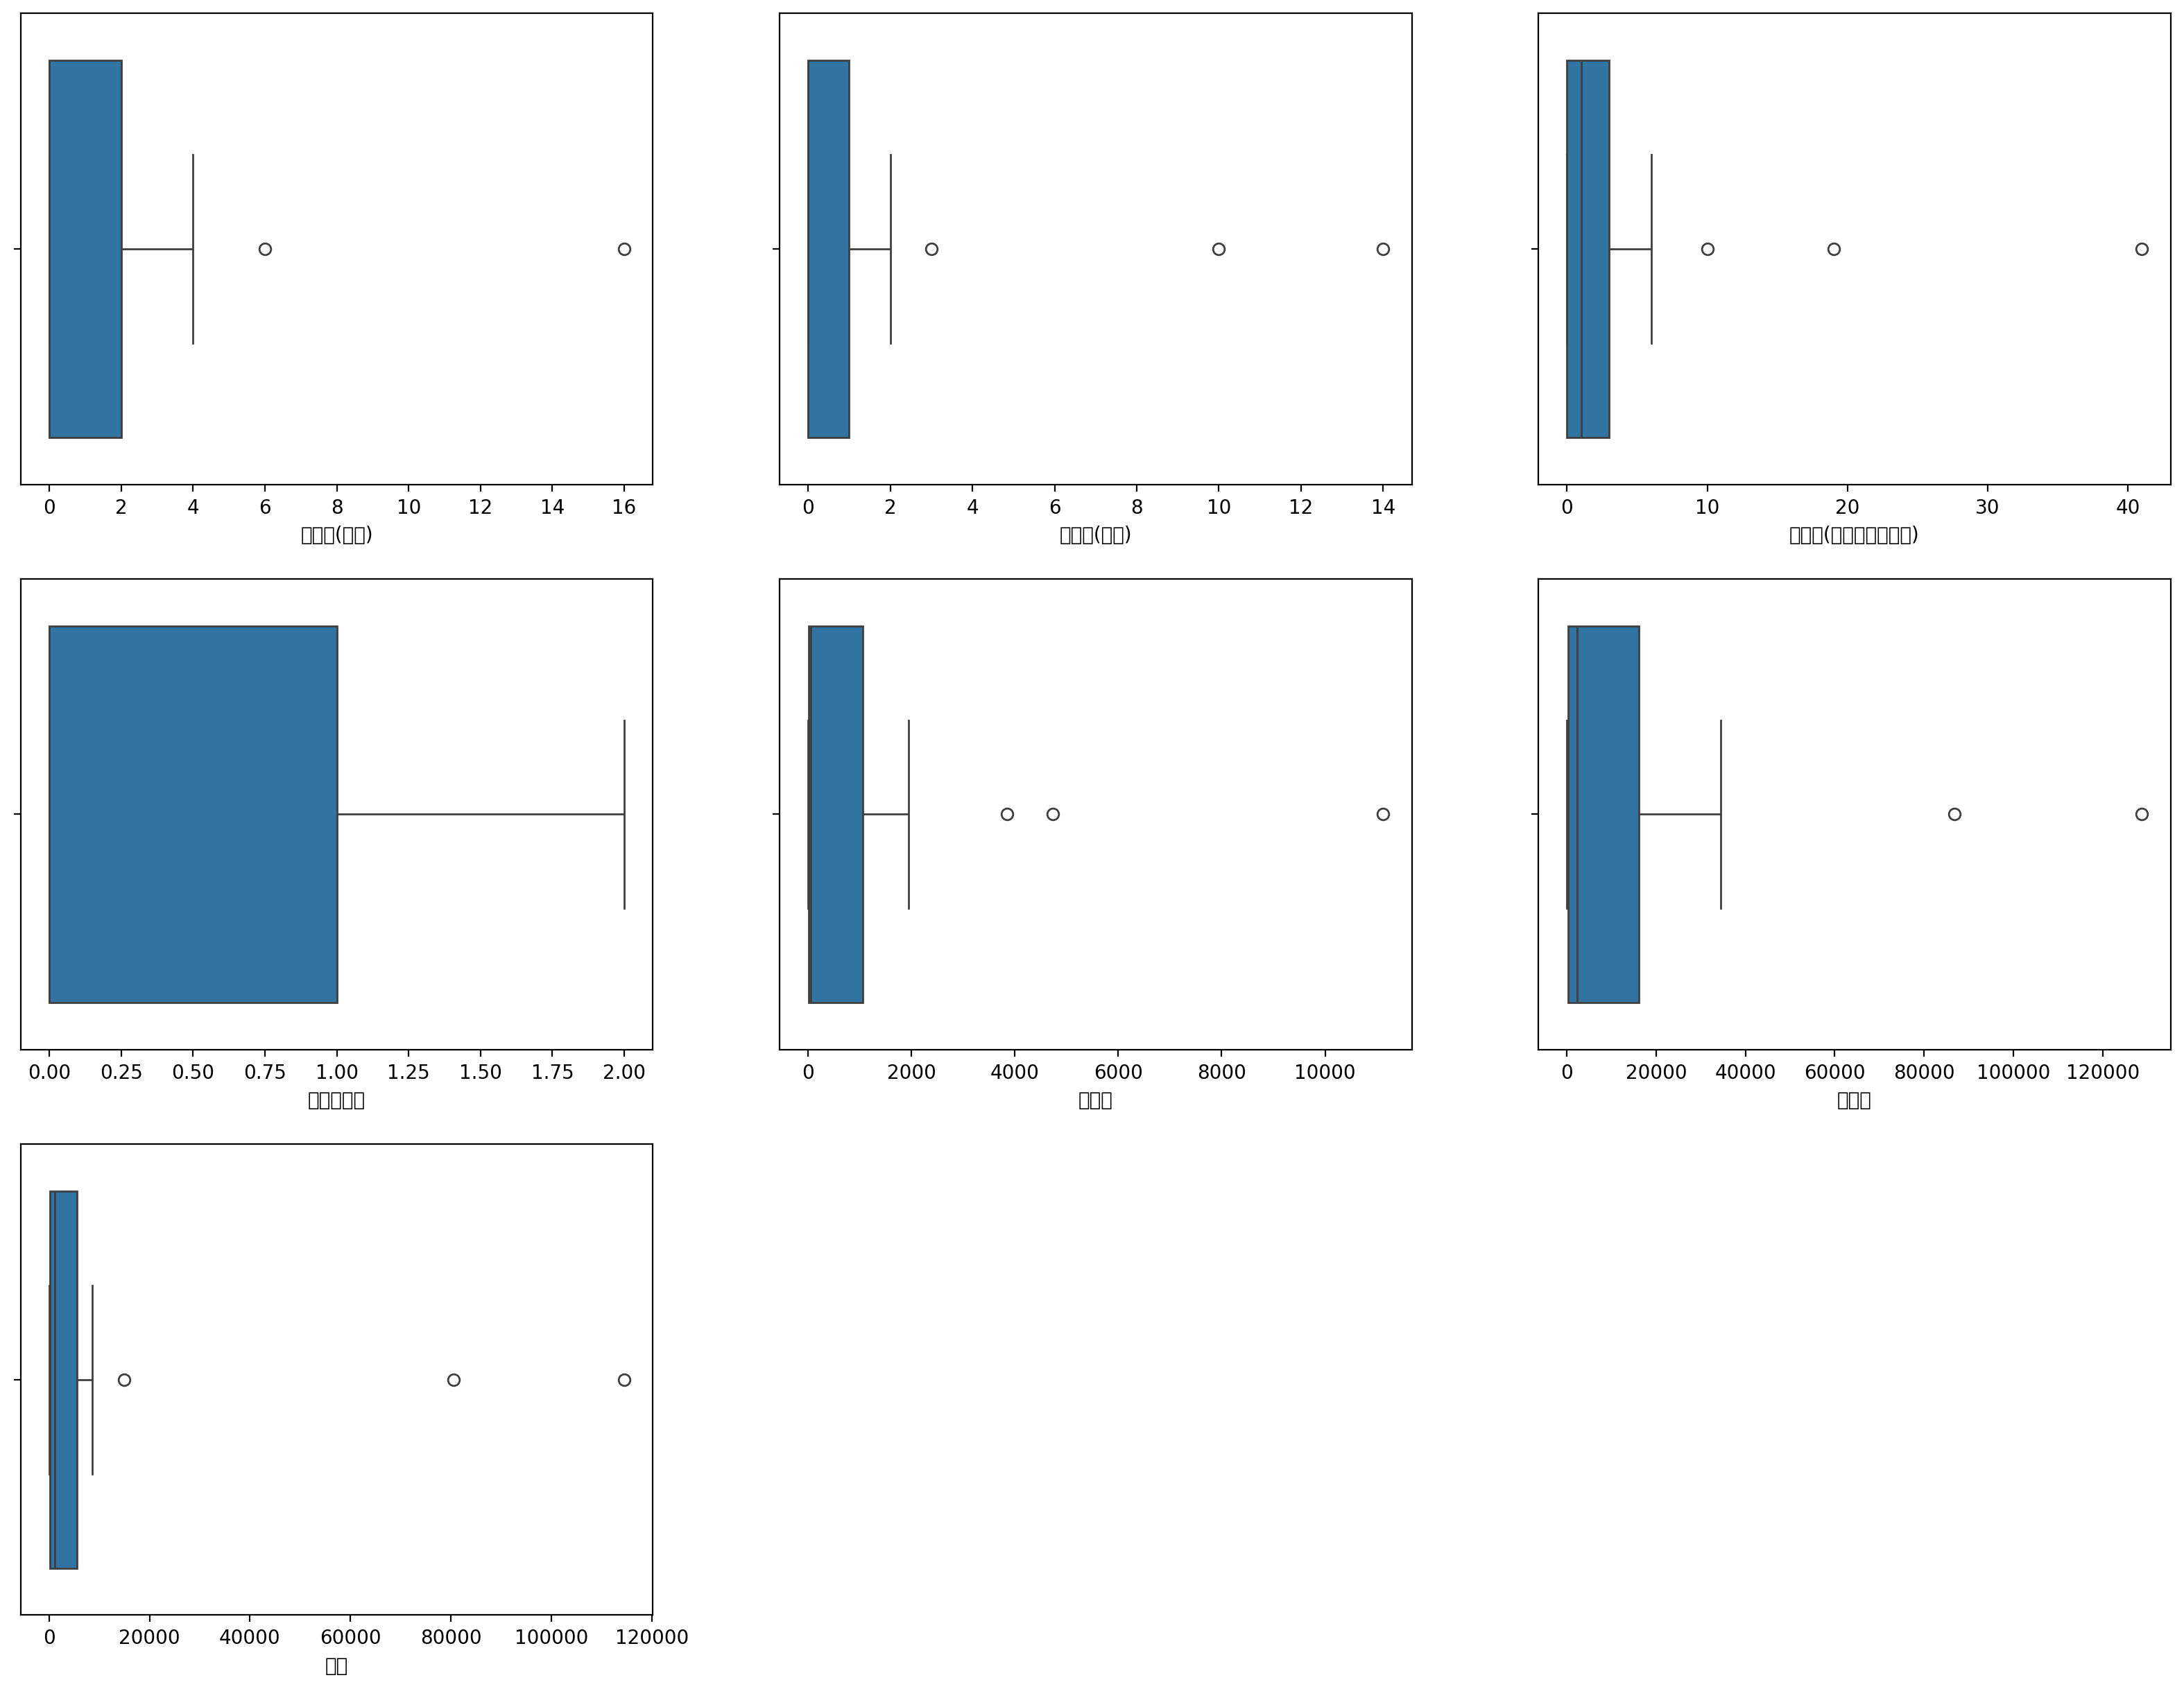

In [9]:
# 선택한 변수의 데이터 값이 적합한지, 한 쪽으로 치우쳐 있지는 않은지 확인

plt.figure(figsize=(20,15), dpi=200) # 그림의 크기를 가로40, 세로20인치로 지정 / dpi를 200으로 설정하여 그림의 해상도를 높임

plt.subplot(3,3,1) # 3열 3행의 subplot 중 첫 번째 subplot
sns.boxplot(x = '마약류(마약)', data = crime_df) # 마약류(마약) 열의 데이터를 사용하며, 위에서 새로 만든 데이터프레임인 crime_df를 사용
plt.subplot(3,3,2) # 3열 3행의 subplot 중 두 번째 subplot
sns.boxplot(x = '마약류(대마)', data = crime_df) # 마약류(대마) 열의 데이터를 사용
plt.subplot(3,3,3) # 3열 3행의 subplot 중 세 번째 subplot
sns.boxplot(x = '마약류(향정신성의약품)', data = crime_df) # (향정신성의약품) 열의 데이터를 사용
plt.subplot(3,3,4) # 3열 3행의 subplot 중 네 번째 subplot
sns.boxplot(x = '본드신나등', data = crime_df) # 본드신나등 열의 데이터를 사용
plt.subplot(3,3,5) # 3열 3행의 subplot 중 다섯 번째 subplot
sns.boxplot(x = '알코올', data = crime_df) # 알코올 열의 데이터를 사용
plt.subplot(3,3,6) # 3열 3행의 subplot 중 여섯 번째 subplot
sns.boxplot(x = '해당무', data = crime_df) # 해당무 열의 데이터를 사용
plt.subplot(3,3,7) # 3열 3행의 subplot 중 일곱 번째 subplot
sns.boxplot(x = '미상', data = crime_df) # 미상 열의 데이터를 사용

실행 결과 모든 데이터 값들이 그림 왼쪽으로 치우쳐져있다.

In [10]:
# 로그 함수를 적용하여 값의 분포를 고르게 조정하여 해결함
import numpy as np

# 로그 변환 수행
crime_df['마약류(마약)_log'] = np.log1p(crime_df['마약류(마약)'])
crime_df['마약류(대마)_log'] = np.log1p(crime_df['마약류(대마)'])
crime_df['마약류(향정신성의약품)_log'] = np.log1p(crime_df['마약류(향정신성의약품)'])
crime_df['본드신나등_log'] = np.log1p(crime_df['본드신나등'])
crime_df['알코올_log'] = np.log1p(crime_df['알코올'])
crime_df['해당무_log'] = np.log1p(crime_df['해당무'])
crime_df['미상_log'] = np.log1p(crime_df['미상'])

<Axes: xlabel='미상_log'>

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from current font.
  func(*args, **kwargs)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Gl

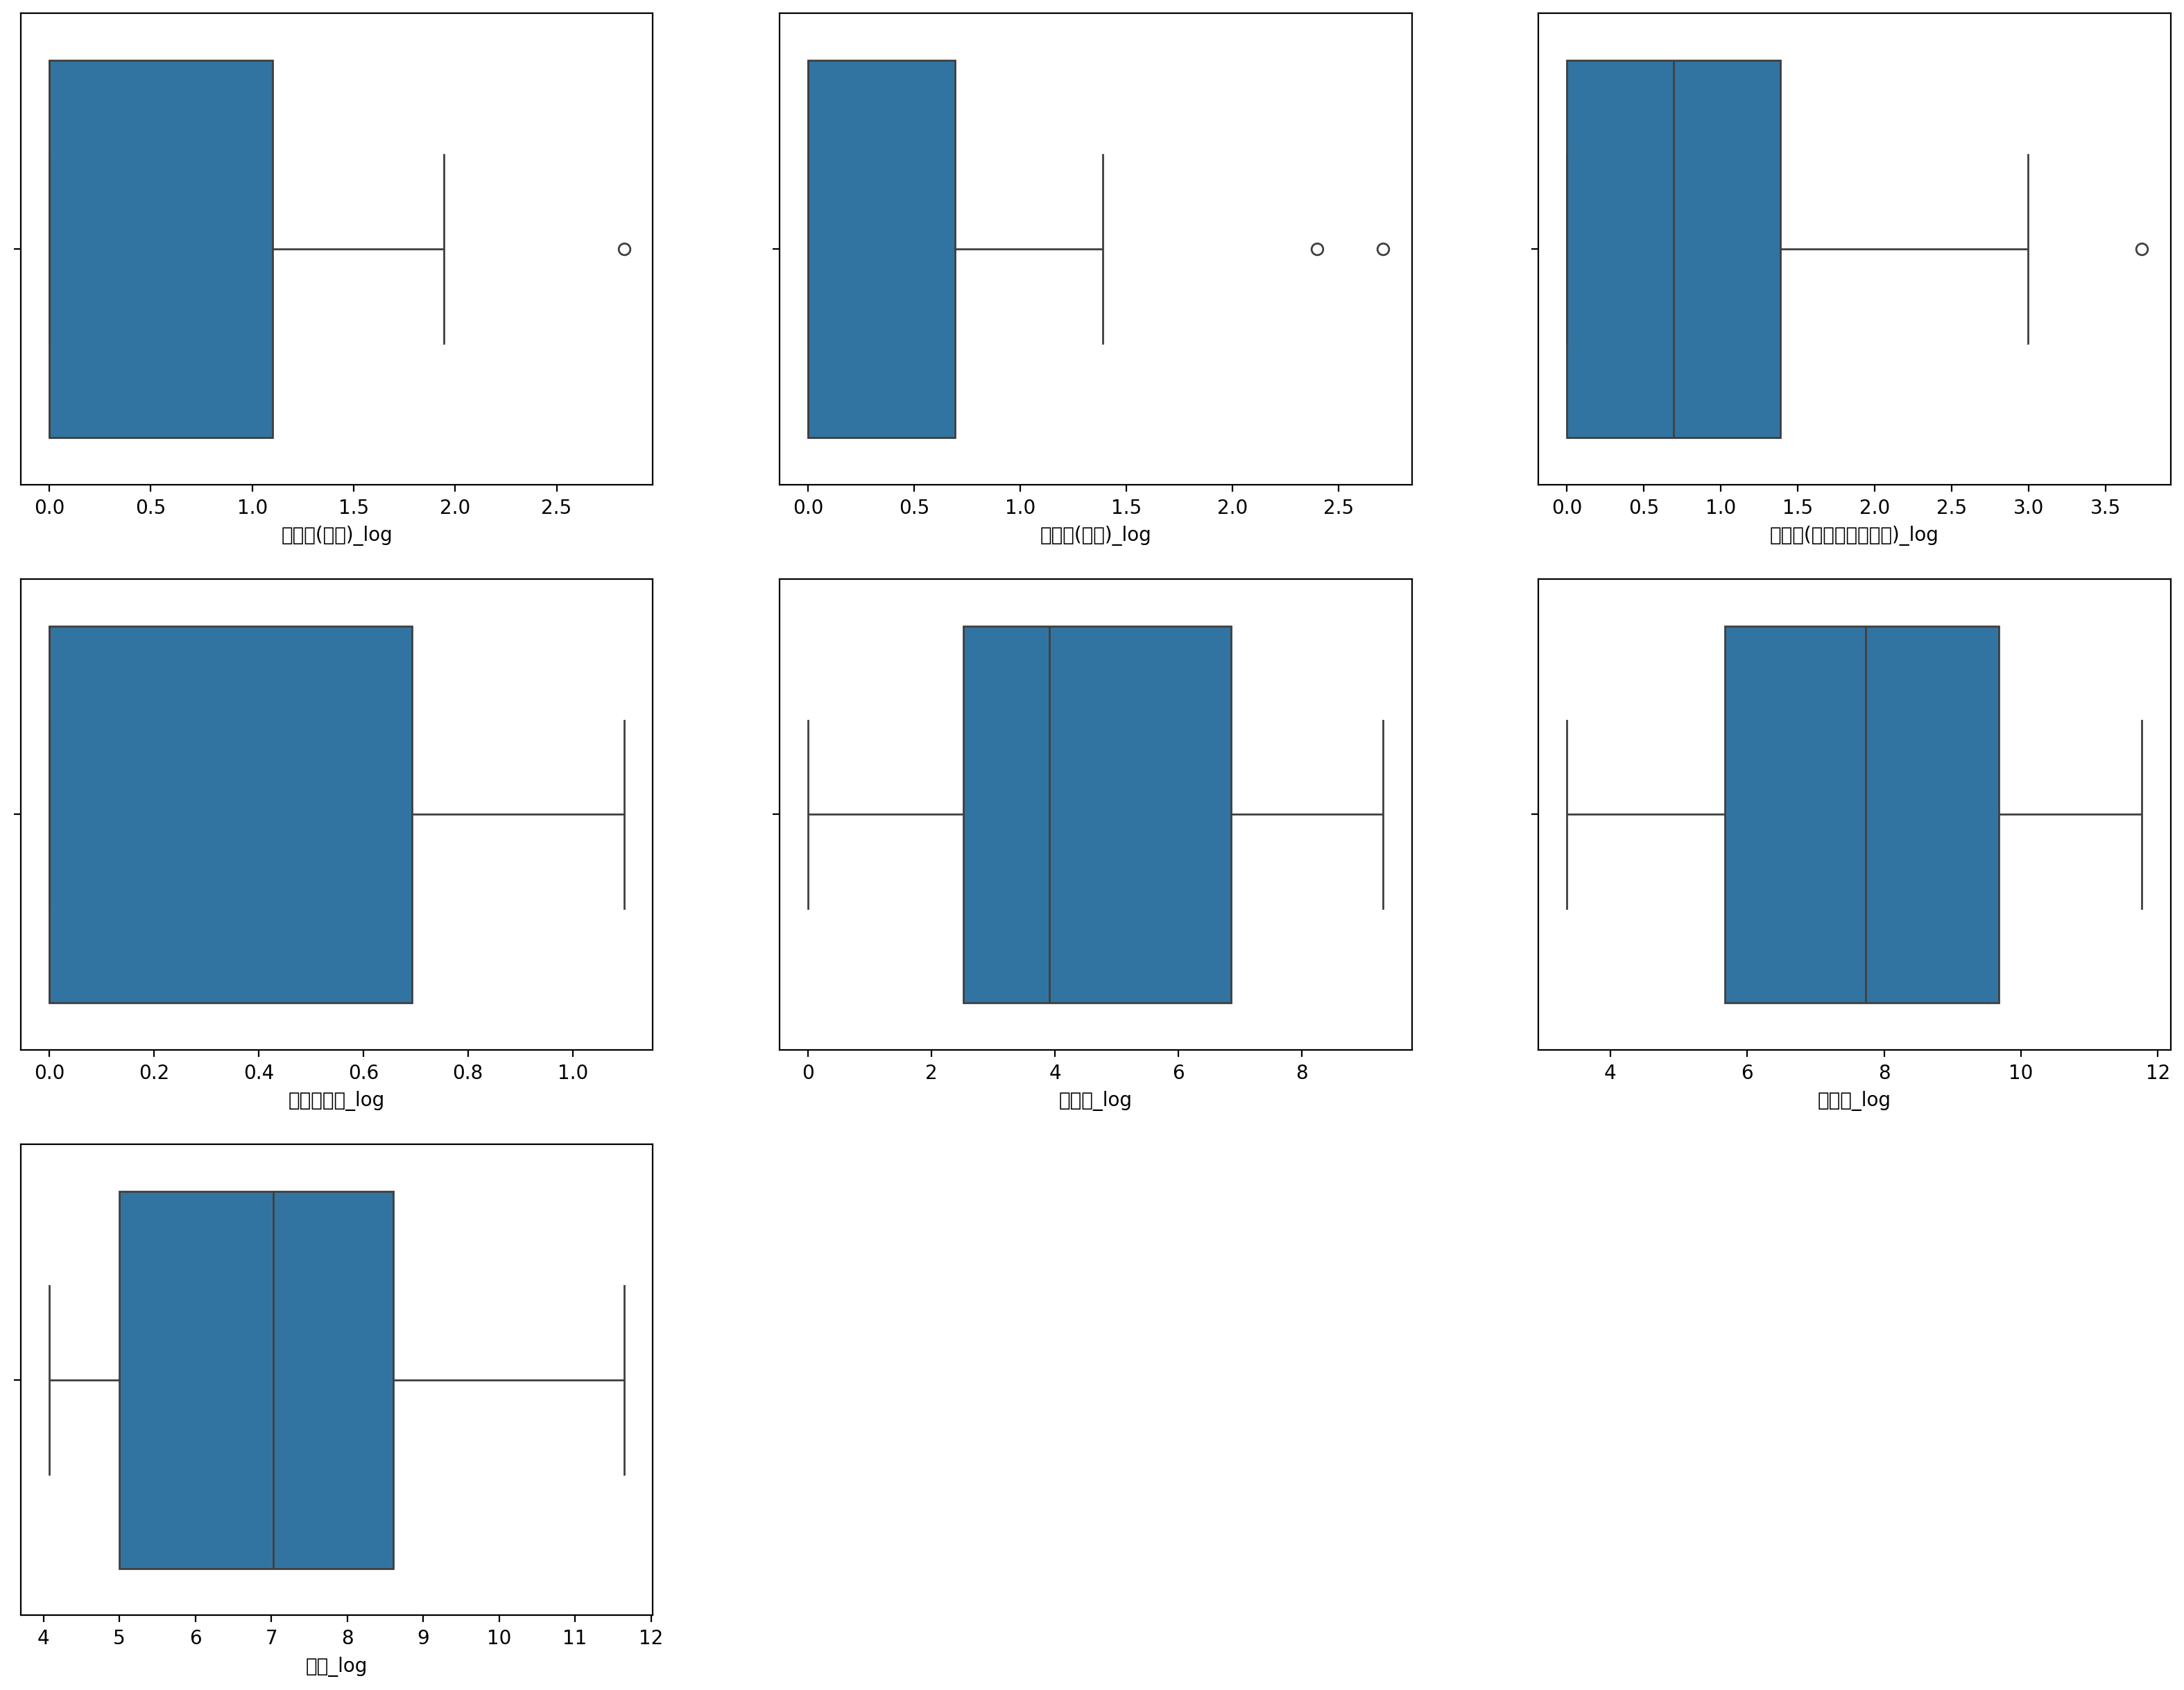

In [11]:
# 수정 후 다시 한 쪽으로 치우쳐 있지는 않은지 확인

plt.figure(figsize=(20,15), dpi=200) # 그림의 크기를 가로20, 세로15인치로 지정 / dpi를 200으로 설정하여 그림의 해상도를 높임

plt.subplot(3,3,1) # 3열 3행의 subplot 중 첫 번째 subplot
sns.boxplot(x = '마약류(마약)_log', data = crime_df) # 마약류(마약) 열의 데이터를 사용하며, 위에서 새로 만든 데이터프레임인 crime_df를 사용
plt.subplot(3,3,2) # 3열 3행의 subplot 중 두 번째 subplot
sns.boxplot(x = '마약류(대마)_log', data = crime_df) # 마약류(대마) 열의 데이터를 사용
plt.subplot(3,3,3) # 3열 3행의 subplot 중 세 번째 subplot
sns.boxplot(x = '마약류(향정신성의약품)_log', data = crime_df) # (향정신성의약품) 열의 데이터를 사용
plt.subplot(3,3,4) # 3열 3행의 subplot 중 네 번째 subplot
sns.boxplot(x = '본드신나등_log', data = crime_df) # 본드신나등 열의 데이터를 사용
plt.subplot(3,3,5) # 3열 3행의 subplot 중 다섯 번째 subplot
sns.boxplot(x = '알코올_log', data = crime_df) # 알코올 열의 데이터를 사용
plt.subplot(3,3,6) # 3열 3행의 subplot 중 여섯 번째 subplot
sns.boxplot(x = '해당무_log', data = crime_df) # 해당무 열의 데이터를 사용
plt.subplot(3,3,7) # 3열 3행의 subplot 중 일곱 번째 subplot
sns.boxplot(x = '미상_log', data = crime_df) # 미상 열의 데이터를 사용

실행 결과 데이터 7개 모두 값들이 고르게 분포되도록 변화한 것을 볼 수 있다.

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 범죄중분류 열을 범주형 데이터 숫자로 변환
le = LabelEncoder()
crime_df['범죄중분류'] = le.fit_transform(crime_df['범죄중분류'])

X_features = crime_df[['마약류(마약)_log', '마약류(대마)_log', '마약류(향정신성의약품)_log', '본드신나등_log', '알코올_log', '해당무_log', '미상_log']].values # 로그 변환된 열을 선택

X_features_scaled = StandardScaler().fit_transform(X_features) # 데이터 스케일링


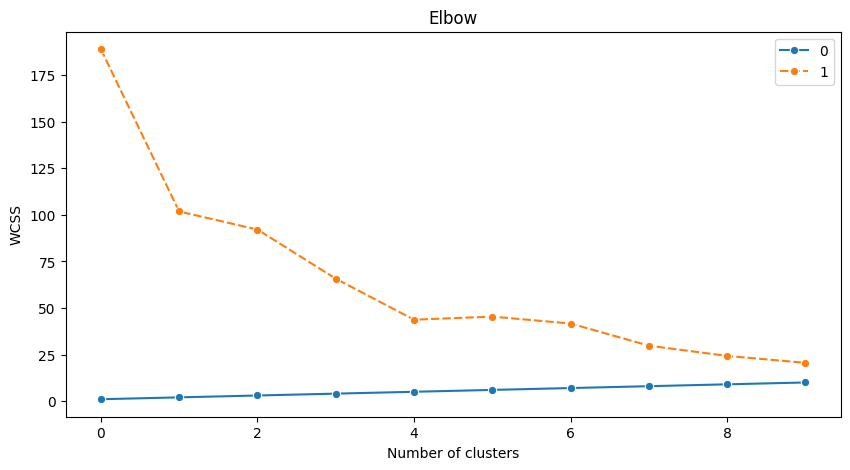

In [25]:
# 앨보 방법으로 클러스터 개수 k 선택하기

wcss = [] # 클러스터링 왜곡을 저장할 빈 리스트 생성

for i in range(1, 11): # 클러스터의 개수를 1부터 10까지 변화시키면서 반복
    kmeans_i = KMeans(n_clusters=i, random_state=42) # 현재 클러스터 개수 i를 설정하여 KMeans 객체 생성
    kmeans_i.fit(X_features_scaled) # 주어진 데이터에 모델을 맞춤
    wcss.append(kmeans_i.inertia_)# WCSS를 계산하여 리스트에 추가

# 엘보우 방법 결과 시각화
plt.figure(figsize=(10,5)) # 새로운 그림 창 생성한 후 그림 크기 설정
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red') 
# x축은 클러스터 개수, y축은 WCSS 값을 나타냄
# 데이터 포인트를 나타내는 마커의 종류를 원으로 지정, 그래프 선 색상 빨강으로 지정
plt.title('Elbow') # 그래프 제목을 Elbow로 지정
plt.xlabel('Number of clusters') # x축의 레이블 설정
plt.ylabel('WCSS') #y축 레이블 설정
plt.show() #화면에 그래프 출력

그래프를 본 결과 클러스터가 4일 때부터 그래프가 안정적이여지므로, 엘보라고 할 수 있는 지점은 4이다.

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_fig

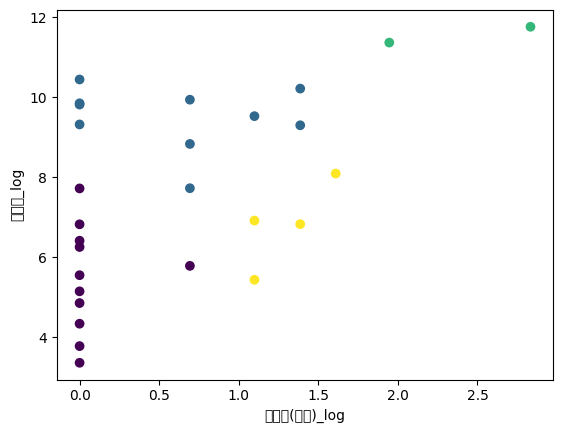

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4) # KMeans 클러스터링을 사용하여 데이터를 클러스터링
kmeans.fit(X_features_scaled)

# 클러스터링 결과를 산점도로 시각화
labels = kmeans.predict(X_features_scaled) # KMeans 모델을 사용하여 데이터 포인트가 속한 클러스터를 예측
plt.scatter(crime_df['마약류(마약)_log'],crime_df['해당무_log'],c = labels)
# x축은 '마약류(마약)_log' 열, y축은 '해당무_log' 열을 나타냄
# c는 각 클러스터를 나타내는 labels 값을 사용하여 각 데이터 포인트의 색상을 지정
plt.xlabel('마약류(마약)_log') # x축의 레이블을 설정
plt.ylabel('해당무_log') #y축의 레이블을 설정
plt.show() # 그래프를 화면에 출력

해당 산점도를 보면 마약류(마약)의 값이 0.0인 경우, 해당무의 값이 고르게 분포되어있는 것을 보아 해당 범위 내 다양한 해당무의 상황이 발생했음을 알 수 있다.
따라서 마약 섭취 수가 없고 마약,알코올 등 해당사항이 없는 범죄가 마약 섭취 후 발생한 범죄보다 더 많다.
마약류(마약)값이 0.5-2.0사이의 값들을 보면 해당무 값이 고르게 드문드문 분포되어 있으므로, 특정한 패턴이나 경향을 가지고 발생했을 가능성이 있다.

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure

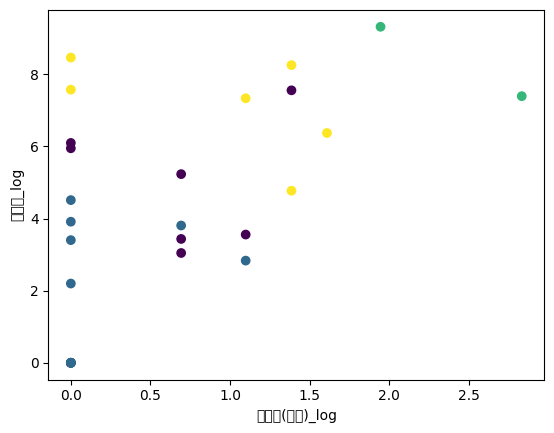

In [52]:
# 마약보다 알코올을 섭취한 후의 범죄 수가 더 높을지 확인하여 비교

kmeans = KMeans(n_clusters = 4) # KMeans 클러스터링을 사용하여 데이터를 클러스터링
kmeans.fit(X_features_scaled)

# 클러스터링 결과를 산점도로 시각화
labels = kmeans.predict(X_features_scaled) # KMeans 모델을 사용하여 데이터 포인트가 속한 클러스터를 예측
plt.scatter(crime_df['마약류(마약)_log'],crime_df['알코올_log'],c = labels)
# x축은 '마약류(마약)_log' 열, y축은 '해당무_log' 열을 나타냄
# c는 각 클러스터를 나타내는 labels 값을 사용하여 각 데이터 포인트의 색상을 지정
plt.xlabel('마약류(마약)_log') # x축의 레이블을 설정
plt.ylabel('알코올_log') #y축의 레이블을 설정
plt.show() # 그래프를 화면에 출력

출력 결과 위 산점도와 비슷한 패턴으로 값이 출력되며, 마약 투여보다는 알코올 섭취 후 일어나는 범죄의 수가 더 많은 것을 알 수 있다.

In [57]:
# 클러스터별 중심점 분석
cluster_centers = kmeans.cluster_centers_

# 각 클러스터의 특성을 설명
for i in range(len(cluster_centers)):
    print("Cluster", i+1, "특성:")
    print(cluster_centers[i])
    print("\n")


Cluster 1 특성:
[ 0.04838871  0.08468858  0.27458735 -0.62747946  0.24650545  0.52825815
  0.30187157]


Cluster 2 특성:
[-0.61542195 -0.61754117 -0.72361587 -0.4735165  -0.86729492 -0.92210567
 -0.72212376]


Cluster 3 특성:
[2.34259071 2.88443946 2.21214903 0.29629829 1.39975524 1.69542883
 2.08080172]


Cluster 4 특성:
[0.39352683 0.17479918 0.38949683 1.58032629 0.98041506 0.66276721
 0.39846345]




Cluster 1: 
 클러스터가 1일 때에는, 대부분의 특성이 양수이다. 마약류(향정신성의약품)이 높고, 해당무 값도 높은 편이다. 이 클러스터는 해당무(마약 섭취가 없는 경우)가 상대적으로 높을 때 발생하는 범죄를 나타낼 수 있다.

Cluster 2: 
 클러스터가 2일 때에는, 대부분의 특성이 음수에 가깝다. 모든 특성이 낮은 값을 가지고 있으며, 특히 마약류(마약), 마약류(대마), 알코올, 해당무가 매우 낮은 것으로 나타난다. 이 클러스터는 해당 사항이 없는 경우를 나타낼 수 있다.

Cluster 3: 
 클러스터가 3일 때에는, 마약류(마약), 마약류(대마), 마약류(향정신성의약품) 값이 높고, 해당무 값은 낮은 편이다. 이 클러스터는 마약류와 관련된 범죄가 높을 가능성이 있으며, 해당무가 적은 지역에서 발생한 범죄를 나타낼 수 있다.

Cluster 4: 
 클러스터가 4일 때에는, 마약류(마약), 마약류(대마), 마약류(향정신성의약품), 알코올 값이 모두 양수이며, 해당무 값도 양수에 가깝다. 이 클러스터는 다양한 범죄 유형이 혼합된 지역을 나타낼 수 있다.

In [55]:
# 실루엣 점수 계산

from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_features_scaled, labels)
#silhouette_score이라는 함수를 이용하여 전체 데이터셋에 대한 실루엣 점수 계산
print("The average silhouette score is:", silhouette_avg)

The average silhouette score is: 0.31555733249369416


실루엣 점수는 -1에서 1 사이의 값을 가지며, 높을수록(값이 1에 가까울수록)
클러스터 간 거리가 멀기 때문에 분리도가 높고, 클러스터 내 데이터 포인트 간 거리가 가까우므로 응집력이 높다.
따라서 값이 높을수록 결과가 좋음을 나타내는데 값이 약 0.32인 것을 보아 전반적으로 중간 정도의 품질을 가진 것을 알 수 있다.
일부 클러스터는 다른 클러스터와 잘 구분되어 있지만, 일부 데이터 포인트는 자신이 속한 클러스터와 다른 클러스터와의 경계가 모호할 수 있다는 의미이다.

따라서 실루엣 점수를 이용하면 클러스터링 결과의 품질을 평가하여 최적의 클러스터 수를 선택하거나 클러스터링 알고리즘의 성능을 비교하는 데 사용할 수 있다.